# Просторова обробка зображень: поелемента обробка

У даній лабораторній роботі розглянуто наступні приклади поелементої обробки зображень:
1. Негативне зображення
2. Зміна контрасту
3. Пере
4. Гама-корекція

### Імпортуємо необхдіні пакети та бібліотеки

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

### Перетворення зображення в негатив

Перетворення зображення у негатив зі значеннями інтенсивності пікселів в діапазоні [0, L-1] визначається наступним виразом:

$$\begin{eqnarray}
s &=& &L &-&1 &-&r
\end{eqnarray}$$

* де s - значення інтенсивності піксела вихідного зображення, L - максимальне значення інтенсивності пікселя вхідного та вихідного зображення, r - значення інтенсивності піксела вхідного зображення.

Даний тип перетворення використовується для підсилення білих та сірих деталей на фоні темних областей зображення.

Реалізуємо дане перетворення за допомогою наступних операції:
1. доступу до окремих пікселів
2. доступу до групи пікселів

Для цього зчитаємо та завантажимо вхідне чорно-біле зображення, відобразимо та визначимо його параметри:

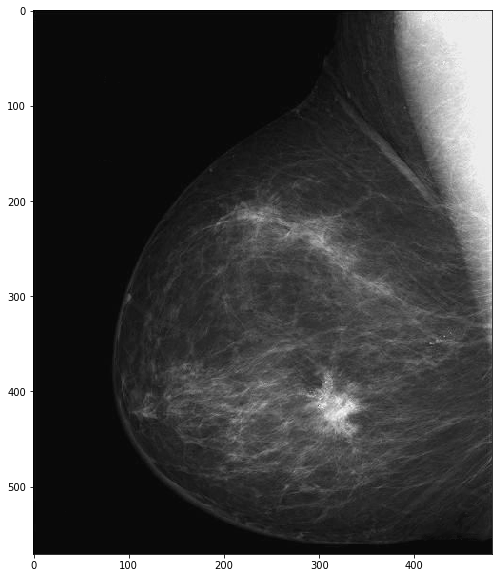

In [2]:
img = cv2.imread("./examples/Fig0304.tif", cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(10,10))
plt.imshow(img, cmap = 'gray'); plt.show();


In [3]:
height = img.shape[0] 
width = img.shape[1]
print(img.dtype)

uint8


Підготуємо пусте вихідне зображення - масив нулів із розміром тестового чороно-білого зображення.

In [4]:
neg_img = np.zeros(img.shape)

Згідно приведеної формули, поелементно визначимо інтенсивність пікселів вихідного зображення:

In [5]:
for row in range(height):
    for col in range(width):
        neg = np.iinfo('uint8').max - 1 - img[row][col]
        neg_img[row][col] = neg

Відобразимо вихідне зображення.

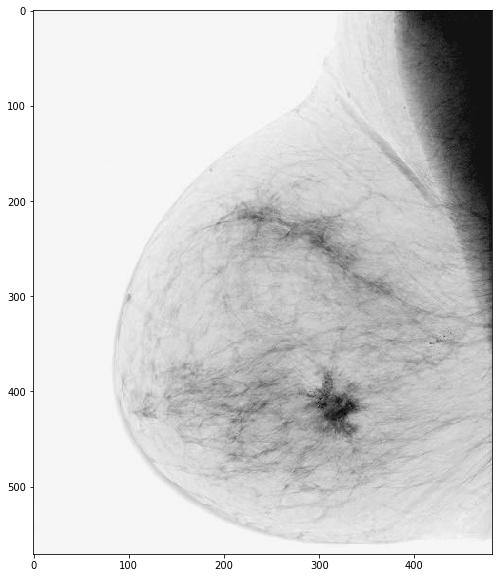

In [6]:
plt.figure(figsize=(10,10))
plt.imshow(neg_img, cmap='gray'); plt.show();

Реалізуємо перетворення в негатив, використовуючи доступ до групи пікселів. Бібліотека NumPy дозволяє виконувати операції над всіма елементами матриці використовуючи синтаксис звичайних арифметичних операцій.

In [7]:
neg_img1 = np.iinfo('uint8').max - 1 - img

Відобразимо вихідне зображення.

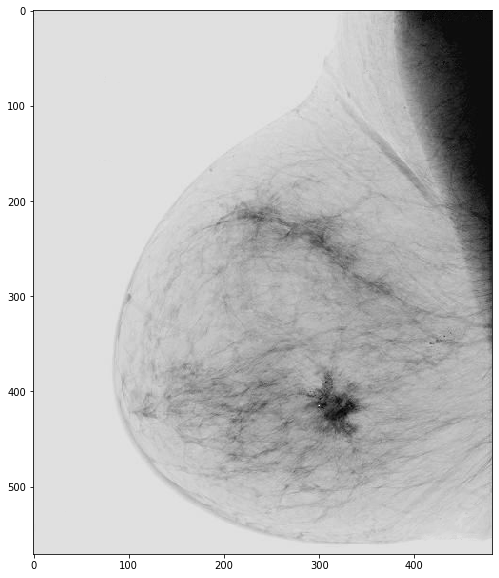

In [8]:
plt.figure(figsize=(10,10))
plt.imshow(neg_img1, cmap='gray'); plt.show();

## Зміна контрасту

Зчитаємо та відобразимо вхідне чорно-біле зображення з низьким контрастом.

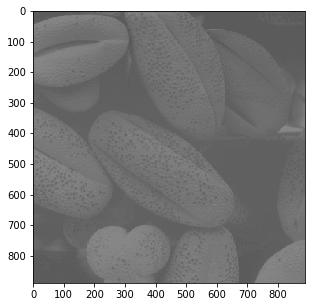

In [9]:
img = cv2.imread('./examples/Fig0310b.tiff', cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(5,5))
plt.imshow(img, cmap='gray', vmin=0, vmax=255);
plt.show()

Визначемо мінімальне та максимальне значення інтенсивності пікселів на вхідному зображенні. Використовуючи ці значення побудуємо графік залежності перетворення інтенсивності вхідного та вихідного зображення.

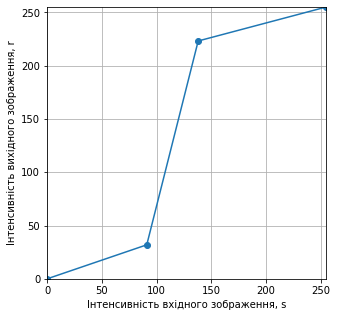

In [10]:
Lmin = np.min(img)
Lmax = np.max(img)
Loutmin = 0
Loutmax = 255

r = [0, Lmin, Lmax, 255]
s = [0, Loutmax/8, Loutmax*7/8, Loutmax]
plt.figure(figsize=(5, 5))
plt.plot(r, s, 'o-')
plt.xlim([0, 255])
plt.ylim([0, 255])
plt.ylabel('Інтенсивність вихідного зображення, r')
plt.xlabel('Інтенсивність вхідного зображення, s')

plt.grid()
plt.show()

In [11]:
Loutmax = 255
contr_img_man = np.zeros(img.shape, img.dtype)
alpha = int(((Loutmax * 7/8) - (Loutmax / 8))/ (Lmax - Lmin))
for y in range(img.shape[0]):
    for x in range(img.shape[1]):
        contr_img_man[y,x] = alpha*(img[y,x] - Lmin) 

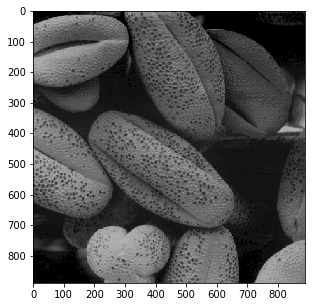

In [12]:
plt.figure(figsize=(5,5))
plt.imshow(contr_img_man, cmap='gray', vmin=0, vmax=255); 
plt.show();

## Гама-корекція

### Перетворення зображення в негатив

Перетворення зображення у негатив зі значеннями інтенсивності пікселів в діапазоні [0, L-1] визначається наступним виразом:

$$\begin{eqnarray}
s &=& &c&r^\gamma
\end{eqnarray}$$

<h3>Read sample image</h3>

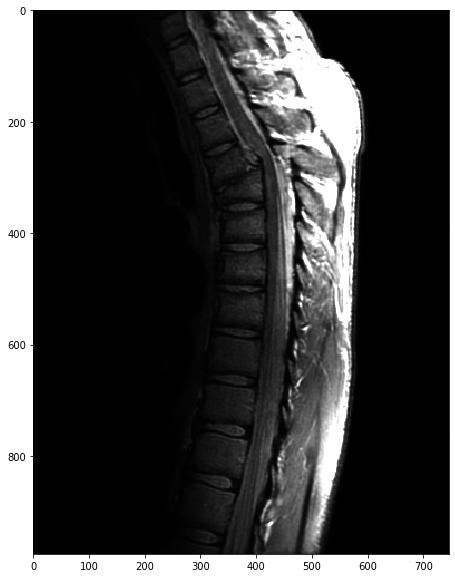

In [13]:
img0308a = cv2.imread("./examples/Fig0308a.tif", cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(10,10))
plt.imshow(img0308a, cmap = 'gray', vmin=0, vmax=255); 
plt.show();

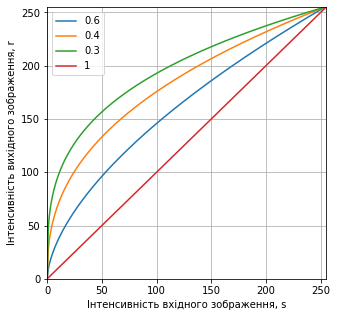

In [14]:
c = 1
gamma1 = 0.6
gamma2 = 0.4
gamma3 = 0.3
gamma4 = 1
s = np.arange(0, 255, 1)

r1 = c * np.power(s, gamma1)
r2 = c * np.power(s, gamma2)
r3 = c * np.power(s, gamma3)
r4 = c * np.power(s, gamma4)

plt.figure(figsize=(5, 5))
plt.plot(s, r1*255/np.max(r1), s, r2*255/np.max(r2), s, r3*255/np.max(r3), s, r4)
plt.grid()
plt.xlim([0, 255])
plt.ylim([0, 255])
plt.legend(['0.6', '0.4', '0.3', '1'])
plt.ylabel('Інтенсивність вихідного зображення, r')
plt.xlabel('Інтенсивність вхідного зображення, s')

plt.show()

<h4>First Gamma correction</h4>

In [15]:
img0308a_1 = c * np.power(img0308a, gamma1)

<h4>Second Gamma correction</h4>

In [16]:
img0308a_2 = c * np.power(img0308a, gamma2)

<h4>Third Gamma correction</h4>

In [17]:
img0308a_3 = c * np.power(img0308a, gamma3)

<h3>Plot gamma corrected sample image</h3>

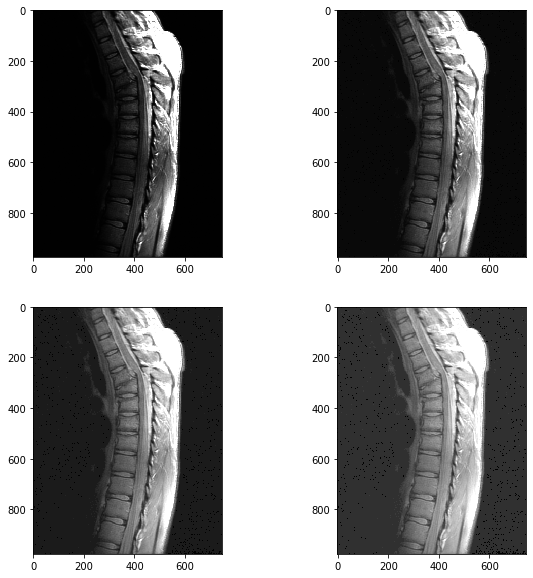

In [18]:
plt.figure(figsize=(10,10))
plt.subplot(221)
plt.imshow(img0308a, cmap = 'gray'); 
plt.subplot(222)
plt.imshow(img0308a_1, cmap='gray');
plt.subplot(223)
plt.imshow(img0308a_2, cmap='gray'); 
plt.subplot(224)
plt.imshow(img0308a_3, cmap='gray'); plt.show();

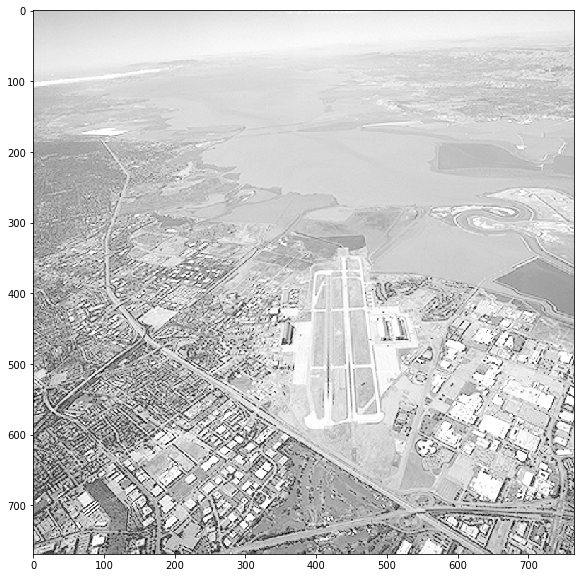

In [19]:
img0309a = cv2.imread("./examples/Fig0309a.tif", cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(10,10))
plt.imshow(img0309a, cmap = 'gray', vmin=0, vmax=255); 
plt.show();

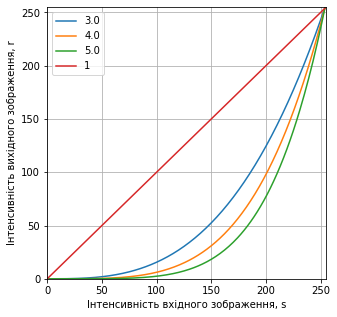

In [20]:
c = 1
gamma1 = 3.0
gamma2 = 4.0
gamma3 = 5.0
gamma4 = 1
s = np.arange(0, 255, 1)

r1 = c * np.power(s, gamma1)
r2 = c * np.power(s, gamma2)
r3 = c * np.power(s, gamma3)
r4 = c * np.power(s, gamma4)

plt.figure(figsize=(5, 5))
plt.plot(s, r1*255/np.max(r1), s, r2*255/np.max(r2), s, r3*255/np.max(r3), s, r4)
plt.grid()
plt.xlim([0, 255])
plt.ylim([0, 255])
plt.legend(['3.0', '4.0', '5.0', '1'])
plt.ylabel('Інтенсивність вихідного зображення, r')
plt.xlabel('Інтенсивність вхідного зображення, s')

plt.show()

In [21]:
img0309a_1 = c * np.power(img0309a, gamma1)

In [22]:
img0309a_2 = c * np.power(img0309a, gamma2)

In [23]:
img0309a_3 = c * np.power(img0309a, gamma3)

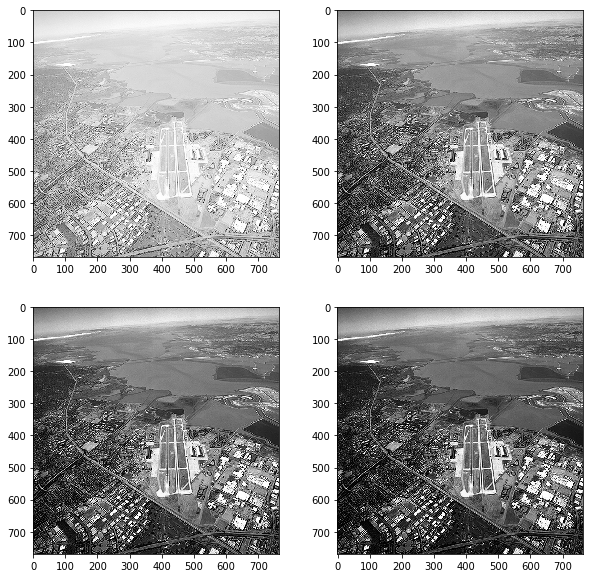

In [24]:
plt.figure(figsize=(10,10))
plt.subplot(221)
plt.imshow(img0309a, cmap = 'gray'); 
plt.subplot(222)
plt.imshow(img0309a_1, cmap='gray');
plt.subplot(223)
plt.imshow(img0309a_2, cmap='gray'); 
plt.subplot(224)
plt.imshow(img0309a_3, cmap='gray');
plt.show();

## Перетворення гістограми, еквалізація

<h3>Getting histogram</h3>

In [25]:
img = cv2.imread('./examples/Fig0310b.tiff')
hist,bins = np.histogram(img.ravel(),256,[0,256])

<h3>Plot histogram</h3>

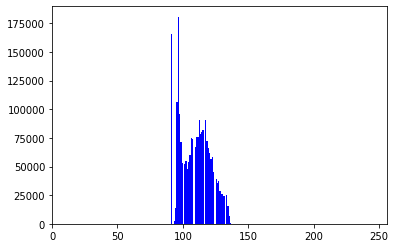

In [26]:
plt.hist(img.ravel(),256,[0,256], color = 'b')
plt.xlim([0,256])
plt.show()

<h3>Histogram Equalization</h3>

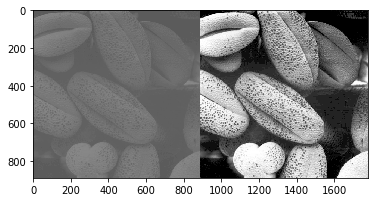

In [28]:
img = cv2.imread('./examples/Fig0310b.tiff', 0)

equ = cv2.equalizeHist(img)
res = np.hstack((img, equ)) 
plt.imshow(res, cmap='gray'); plt.show();